In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import glob
import pandas as pd

In [4]:
shared_path = "/content/drive/My Drive/Big Data A3"  # For Shared drives

# Check the folder exists
if not os.path.exists(shared_path):
    raise FileNotFoundError("Couldn't find 'Big Data A3' — check your shared drive path")


files = glob.glob(shared_path + "/*.parquet")
print(files)

['/content/drive/My Drive/Big Data A3/Gift_Cards_Merged.parquet', '/content/drive/My Drive/Big Data A3/Digital_Music_Merged.parquet', '/content/drive/My Drive/Big Data A3/Health_and_Personal_Care_Merged.parquet', '/content/drive/My Drive/Big Data A3/All_Beauty_Merged.parquet', '/content/drive/My Drive/Big Data A3/Amazon_Fashion_Merged.parquet', '/content/drive/My Drive/Big Data A3/Appliances_Merged.parquet', '/content/drive/My Drive/Big Data A3/Cell_Phones_Merged.parquet', '/content/drive/My Drive/Big Data A3/Health_and_Household_Merged.parquet', '/content/drive/My Drive/Big Data A3/Baby_Products_Merged.parquet', '/content/drive/My Drive/Big Data A3/Arts_Crafts_and_Sewing_Merged.parquet', '/content/drive/My Drive/Big Data A3/CDs_and_Vinyl_Merged.parquet', '/content/drive/My Drive/Big Data A3/Kindle_Store_Merged.parquet', '/content/drive/My Drive/Big Data A3/Industrial_and_Scientific_Merged.parquet', '/content/drive/My Drive/Big Data A3/Magazine_Subscriptions.parquet', '/content/drive/M

In [5]:
# List of all Parquet file paths
parquet_paths = [
    '/content/drive/My Drive/Big Data A3/Gift_Cards_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Digital_Music_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Health_and_Personal_Care_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/All_Beauty_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Amazon_Fashion_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Appliances_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Cell_Phones_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Health_and_Household_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Baby_Products_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Arts_Crafts_and_Sewing_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/CDs_and_Vinyl_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Kindle_Store_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Industrial_and_Scientific_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Magazine_Subscriptions.parquet',
    '/content/drive/My Drive/Big Data A3/Musical_Instruments_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Office_Products_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Movies_and_TV_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Patio_Lawn_and_Garden_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Handmade_Products_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Beauty_and_Personal_Care_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Subscription_Boxes_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Grocery_and_Gourmet_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Pet_Supplies_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Software_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Electronics_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Sports_and_Outdoors_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Automotive_Merged.parquet',
    '/content/drive/My Drive/Big Data A3/Video_Games_Merged.parquet',

]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
from collections import Counter
import json

In [ ]:
# Accumulate counts in a Counter
global_counts = Counter()

for path in parquet_paths:
    # Load just details
    df_year = dd.read_parquet(path, columns=['store'])
    # Compute top-10 brands for this file
    top10 = (
        df_year['store']
        .dropna()
        .value_counts()   # Dask series
        .nlargest(10)     # still lazy
        .compute()        # pandas Series of top50
    )
    # Update global counts
    global_counts.update(top10.to_dict())

# Convert Counter to DataFrame
brand_counts = pd.DataFrame.from_records(
    list(global_counts.items()),
    columns=['brand', 'count']
)

# Exclude Unknown, pick top10, and plot
top10 = brand_counts[brand_counts.brand!='Unknown'].nlargest(10, 'count')

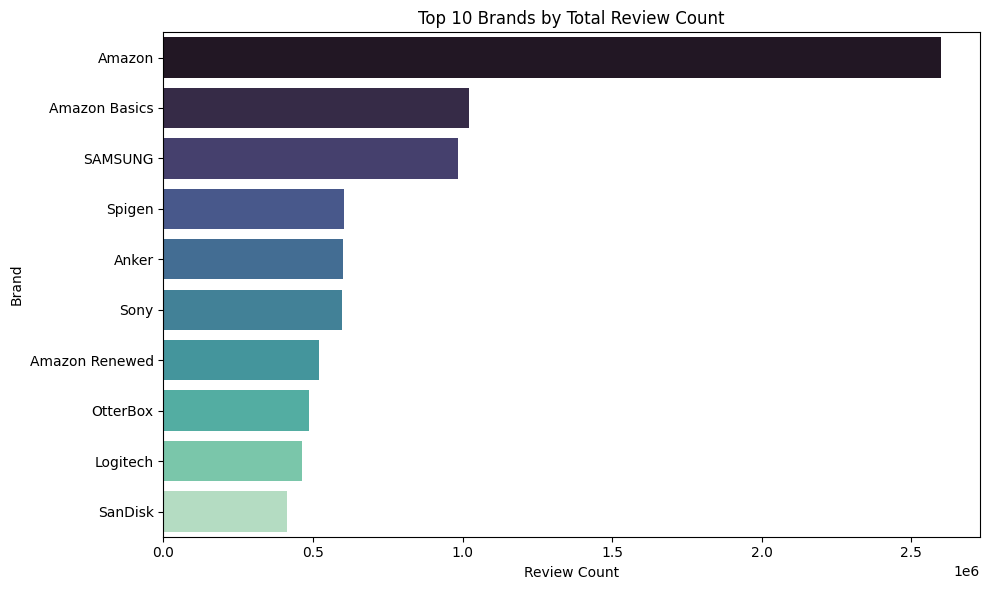

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='count', y='brand', orient='h', palette = 'mako', hue ='brand')
plt.title('Top 10 Brands by Total Review Count')
plt.xlabel('Review Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()